In [151]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
import sqlite3
import numpy as np


In [152]:

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('../database6.db')

# Consulta SQL para selecionar os dados da tabela desejada
query = "SELECT * FROM vaga;"

# Ler os dados do banco de dados SQLite para um DataFrame do Pandas
dados = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()
# dados = pd.read_csv("linkedin_jobs.csv")


In [153]:
dados = dados.reset_index(drop=True)
dados.set_index('id', inplace=True)


In [154]:
dados[(['company'])].describe()

,company
count,697
unique,352
top,GeekHunter
freq,29


In [155]:
dados_tec=dados[dados['title'].str.contains("QA|Implantação|Programação|Desenvolvedor|Programador|Developer|Analista|Desenvolvimento|Engenheiro|Software|Estágio|Tecnologicas|Tecnologia|Computação|Tech|stack|Dev|Data|Desenvolver|TI",case=False, regex=True)]

In [156]:
dados_tec

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3837864590,2024-03-03,Deloitte,Desenvolvedor (a) Júnior - Brasil,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades de consultoria em gestão empresarial,"DescriptionNa Deloitte, buscamos pessoas que q..."
2,3823911497,2024-03-03,Hiper Software,Desenvolvedor,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...
5,3798755517,2024-03-03,Brivia | The Creative Smartech,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...
693,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None
694,3831452244,2024-03-03,Foursys,Desenvolvedor(a) de Front-end React - Sênior,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"A Foursys é um time apaixonado por inovação, d..."


In [157]:

dados_tec.drop_duplicates(inplace=True)
dados_tec[dados_tec.duplicated()]

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1723577738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.drop_duplicates(inplace=True)


,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,


In [158]:
# dados_tec['job_id'] = dados_tec['link'].apply(lambda x: x.split("?")[0].rsplit('-', 1)[-1])

In [159]:
dados_tec.job_id

id
1      3837864590
2      3823911497
3      3760170978
4      3841368287
5      3798755517
          ...    
692    3817798912
693    3813671037
694    3831452244
695    3839068670
696    3842279664
Name: job_id, Length: 689, dtype: int64

In [160]:
dados_tec.drop_duplicates(subset=['job_id'],inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1668668586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.drop_duplicates(subset=['job_id'],inplace=True)


In [161]:
dados_tec

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3837864590,2024-03-03,Deloitte,Desenvolvedor (a) Júnior - Brasil,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades de consultoria em gestão empresarial,"DescriptionNa Deloitte, buscamos pessoas que q..."
2,3823911497,2024-03-03,Hiper Software,Desenvolvedor,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...
5,3798755517,2024-03-03,Brivia | The Creative Smartech,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...
693,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None
694,3831452244,2024-03-03,Foursys,Desenvolvedor(a) de Front-end React - Sênior,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"A Foursys é um time apaixonado por inovação, d..."


In [162]:
dados_tec.columns

Index(['job_id', 'register_date', 'company', 'title', 'location',
       'time_opened', 'link', 'applications', 'experience_level', 'job_type',
       'role', 'sectors', 'description'],
      dtype='object')

In [163]:
# desired_order = ['job_id', 'title', 'location', 'time_opened','link','applications','experience_level','job_type','role','sectors','description']  # Specify the desired order of column names

# dados_tec = dados_tec[desired_order] 

In [164]:
dados_tec


,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3837864590,2024-03-03,Deloitte,Desenvolvedor (a) Júnior - Brasil,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades de consultoria em gestão empresarial,"DescriptionNa Deloitte, buscamos pessoas que q..."
2,3823911497,2024-03-03,Hiper Software,Desenvolvedor,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...
5,3798755517,2024-03-03,Brivia | The Creative Smartech,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,None,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...
693,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None
694,3831452244,2024-03-03,Foursys,Desenvolvedor(a) de Front-end React - Sênior,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,Mais de 200 candidaturas,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"A Foursys é um time apaixonado por inovação, d..."


In [165]:
dados_tec.isnull().sum()

job_id                0
register_date         0
company               0
title                 0
location              0
time_opened           0
link                  0
applications        379
experience_level    210
job_type            210
role                210
sectors             213
description         210
dtype: int64

In [166]:
dados_tec.applications.value_counts()

applications
Seja um dos 25 primeiros a se candidatar    261
Mais de 200 candidaturas                     49
Name: count, dtype: int64

In [167]:
dados_tec.applications.fillna('Hidden',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\4249411417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.applications.fillna('Hidden',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\4249411417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.applications.fillna('Hidden',inplace=True)


In [168]:
dados_tec.loc[dados['applications']=='Seja um dos 25 primeiros a se candidatar','applications']="<=25"

In [169]:
dados_tec.loc[dados['applications']=='Mais de 200 candidaturas','applications']=">25"

In [170]:
dados_tec.applications.value_counts()

applications
Hidden    379
<=25      261
>25        49
Name: count, dtype: int64

In [171]:
dados_tec.isnull().sum()

job_id                0
register_date         0
company               0
title                 0
location              0
time_opened           0
link                  0
applications          0
experience_level    210
job_type            210
role                210
sectors             213
description         210
dtype: int64

In [172]:
dados_tec.experience_level.value_counts()

experience_level
Assistente       233
Pleno-sênior     144
Não aplicável     96
Executivo          2
Diretor            2
Estágio            1
Júnior             1
Name: count, dtype: int64

In [173]:
dados_tec.experience_level.fillna('Assistente',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1583094988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.experience_level.fillna('Assistente',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1583094988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.experience_level.fillna('Assistente',inplace=Tru

In [174]:
dados_tec.experience_level.value_counts()

experience_level
Assistente       443
Pleno-sênior     144
Não aplicável     96
Executivo          2
Diretor            2
Estágio            1
Júnior             1
Name: count, dtype: int64

In [175]:
dados_tec.job_type.value_counts()

job_type
Tempo integral    464
Contrato           14
Temporário          1
Name: count, dtype: int64

In [176]:
dados_tec.job_type.fillna('Tempo integral',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\3450007596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.job_type.fillna('Tempo integral',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\3450007596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.job_type.fillna('Tempo integral',inplace=True)


In [177]:
dados_tec.role.value_counts()

role
Engenharia e Tecnologia da informação                   322
Tecnologia da informação                                 73
Desenvolvimento de negócios e Vendas                     38
Outro                                                    21
Analista                                                  4
Engenharia                                                2
Educação e Treinamento                                    2
Atividades de serviços financeiros                        2
Tecnologia da informação, Manufatura e Gerenciamento      1
Desenvolvimento de negócios                               1
Recursos humanos                                          1
Pesquisa, Analista e Tecnologia da informação             1
Administração                                             1
Publicidade                                               1
Gestão de produtos e Marketing                            1
Financeiro                                                1
Design, Arte/Criação e Tecnologia d

In [178]:
dados_tec.role.fillna('Engenharia e Tecnologia da informação',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\3605342044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.role.fillna('Engenharia e Tecnologia da informação',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\3605342044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.role.fillna('Engenharia e Tecnolo

In [179]:
dados_tec.sectors.value_counts()

sectors
Atividades dos serviços de tecnologia da informação                   123
Tecnologia, Informação e Internet                                      51
Fornecimento e gestão de recursos humanos                              46
Segurança de redes e computadores                                      35
Recrutamento e seleção de pessoal                                      31
                                                                     ... 
Atividades de apoio à educação                                          1
Alimentos e bebidas                                                     1
Armazenamento e atividades auxiliares dos transportes                   1
Infraestrutura e análise de dados                                       1
Fabricação de artigos para viagem e de artefatos diversos de couro      1
Name: count, Length: 68, dtype: int64

In [180]:
dados_tec.sectors.fillna('Atividades dos serviços de tecnologia da informação',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\2035285023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.sectors.fillna('Atividades dos serviços de tecnologia da informação',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\2035285023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.sectors.fillna('

In [181]:
dados_tec.description.fillna('Sem descrição',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\2141726329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.description.fillna('Sem descrição',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\2141726329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.description.fillna('Sem descrição',inplace=True)


In [182]:
dados_tec

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,,,,
1,3837864590,2024-03-03,Deloitte,Desenvolvedor (a) Júnior - Brasil,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades de consultoria em gestão empresarial,"DescriptionNa Deloitte, buscamos pessoas que q..."
2,3823911497,2024-03-03,Hiper Software,Desenvolvedor,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...
5,3798755517,2024-03-03,Brivia | The Creative Smartech,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...
693,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição
694,3831452244,2024-03-03,Foursys,Desenvolvedor(a) de Front-end React - Sênior,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"A Foursys é um time apaixonado por inovação, d..."


In [183]:
dados_nao_nulos = dados_tec
dados_nao_nulos.isnull().sum()

job_id              0
register_date       0
company             0
title               0
location            0
time_opened         0
link                0
applications        0
experience_level    0
job_type            0
role                0
sectors             0
description         0
dtype: int64

In [184]:
regex_str = r'Excel|Windows|Linux|\\bC\\b|\\bC\+\+\\b|\bGIT|ASSEMBLY|GRAPHQL|DELPHI|PL/SQL|Node\.?JS|CSS|HTML|Wordpress|Angular(?:JS)?|Airflow|NOSQL|Spark|Power BI|Salesforce|DotNet|PASCAL|COBOL|ABAP|JAVASCRIPT|JAVA|SQL|Python|Angular|\.NET|AWS|GCP|Azure|Cloud|C#|Flutter|React|REACT\.JS|Ruby|Rails|Bootstrap|jQuery|Vue\.js|Express|Django|Spring|MVC|Android|Kotlin|GOLANG|\bGO\b|Swift|Objective-C|PHP|Laravel'


In [185]:
#Buscar tecnologia no titulo da vaga
def busca_tecnologia(title):
    tecnologia =[]
    matches=re.findall(regex_str, title,re.IGNORECASE)
    if matches:
        for match in matches:
            cleaned_match = match.upper().replace(" ", "").replace("-", "")
            tecnologia.append(cleaned_match)

        tecnologia = list(set(tecnologia))
        
        for i, item in enumerate(tecnologia):
            if item == "GOLANG":
                tecnologia[i] = "GO"
            elif item == "DOTNET" or item == "NET":
                tecnologia[i] = ".NET"
            elif item == "NODEJS":
                tecnologia[i] = "NODE.JS"
            elif item == "REACTJS":
                tecnologia[i] = "REACT"
            elif item == "REACT.JS":
                tecnologia[i] = "REACT"
#     
    else: 
        tecnologia= ["Não especificado"]
        
    return ', '.join(map(str, tecnologia))
    
#Buscar tecnologia no titulo da vaga
def busca_tecnologia_grafico(title):
    tecnologia =[]
    matches=re.findall(regex_str, title,re.IGNORECASE)
    if matches:
        for match in matches:
            cleaned_match = match.upper().replace(" ", "").replace("-", "")
            tecnologia.append(cleaned_match)

        tecnologia = list(set(tecnologia))
        
        for i, item in enumerate(tecnologia):
            if item == "GOLANG":
                tecnologia[i] = "GO"
            elif item == "DOTNET" or item == "NET":
                tecnologia[i] = ".NET"
            elif item == "NODEJS":
                tecnologia[i] = "NODE.JS"
#     
    else: 
        tecnologia = "Não especificado"
        
    return  tecnologia

In [186]:
dados_nao_nulos['temp'] = dados_nao_nulos['title'] +" "+ dados_nao_nulos['description']
dados_nao_nulos['requisitos'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia(x))
dados_nao_nulos['lista'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia_grafico(x))

dados_nao_nulos = dados_nao_nulos.drop(columns=['temp'])

C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1252677813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_nulos['temp'] = dados_nao_nulos['title'] +" "+ dados_nao_nulos['description']
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1252677813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_nulos['requisitos'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia(x))
C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\1252677813.py:3: SettingWithCopyWarning: 
A value is tryin

In [187]:
dados_nao_nulos.requisitos.describe()

count                  689
unique                 369
top       Não especificado
freq                   144
Name: requisitos, dtype: object

In [188]:
dados_nao_nulos.requisitos.value_counts()

requisitos
Não especificado                                        144
.NET                                                     35
JAVA                                                     32
PYTHON                                                   12
EXCEL                                                    10
                                                       ... 
SPRING, GIT, JAVA, SQL, .NET, PL/SQL                      1
GIT, NOSQL, NODE.JS, JAVASCRIPT                           1
CLOUD, SPRING, GIT, JAVA, NOSQL, AWS                      1
HTML, PHP, GIT, SQL, AWS, JAVASCRIPT, CSS, WORDPRESS      1
GRAPHQL, REACT, CLOUD, SQL, AWS, NODE.JS, JAVASCRIPT      1
Name: count, Length: 369, dtype: int64

In [189]:
dados_nao_nulos.head(30)

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,,,,
1,3837864590,2024-03-03,Deloitte,Desenvolvedor (a) Júnior - Brasil,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades de consultoria em gestão empresarial,"DescriptionNa Deloitte, buscamos pessoas que q...",Não especificado,Não especificado
2,3823911497,2024-03-03,Hiper Software,Desenvolvedor,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...,Não especificado,Não especificado
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...,"PHP, SQL","[PHP, SQL]"
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...,"NODE.JS, EXPRESS, CLOUD, PHP, LINUX, GIT, JAVA...","[NODE.JS, EXPRESS, CLOUD, PHP, LINUX, GIT, JAV..."
5,3798755517,2024-03-03,Brivia | The Creative Smartech,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
6,3809098562,2024-03-03,Devio,Desenvolvedor full stack jr,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Contrato,Tecnologia da informação,Serviços de gestão estratégica,Olá Dev.Estamos com posições em andamento aqui...,Não especificado,Não especificado
7,3826600736,2024-03-03,Rappi,Back End Developer,"São Paulo, SP",Há 3 semanas,https://br.linkedin.com/jobs/view/back-end-dev...,>25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"Hey, é hora de você se juntar a nós para mostr...","PHP, GO, JAVA, SQL, NODE.JS","[PHP, GO, JAVA, SQL, NODE.JS]"
8,3792572282,2024-03-03,Campanha Digital,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ...",WORDPRESS,[WORDPRESS]
9,3778915549,2024-03-03,B4A,Desenvolvedor(a) Front-End Júnior (Angular),"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Aqui você vai encontrar:Oportunidade de aprend...,"GIT, ANGULAR, NOSQL, JAVA","[GIT, ANGULAR, NOSQL, JAVA]"


In [190]:
# export_test= dados_nao_nulos[dados_nao_nulos.requisitos=="SQL"]



In [191]:
# export_test.to_excel("exports_test.xlsx")
dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,,,,
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...,"PHP, SQL","[PHP, SQL]"
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...,"NODE.JS, EXPRESS, CLOUD, PHP, LINUX, GIT, JAVA...","[NODE.JS, EXPRESS, CLOUD, PHP, LINUX, GIT, JAV..."
7,3826600736,2024-03-03,Rappi,Back End Developer,"São Paulo, SP",Há 3 semanas,https://br.linkedin.com/jobs/view/back-end-dev...,>25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"Hey, é hora de você se juntar a nós para mostr...","PHP, GO, JAVA, SQL, NODE.JS","[PHP, GO, JAVA, SQL, NODE.JS]"
8,3792572282,2024-03-03,Campanha Digital,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ...",WORDPRESS,[WORDPRESS]
9,3778915549,2024-03-03,B4A,Desenvolvedor(a) Front-End Júnior (Angular),"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Aqui você vai encontrar:Oportunidade de aprend...,"GIT, ANGULAR, NOSQL, JAVA","[GIT, ANGULAR, NOSQL, JAVA]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,3778865708,2024-03-03,Tec2Cloud,Líder Técnico - Automação de Testes (QA),"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/l%C3%ADder-t...,Hidden,Pleno-sênior,Tempo integral,Controle de qualidade,Segurança de redes e computadores,Sobre a Tec2CloudSomos uma Consultoria de Tecn...,"CLOUD, JAVA, AZURE, RUBY, AWS, PYTHON, .NET, J...","[CLOUD, JAVA, AZURE, RUBY, AWS, PYTHON, .NET, ..."
692,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...,"PL/SQL, DELPHI","[PL/SQL, DELPHI]"
693,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,.NET,[.NET]


In [192]:
df = dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

# Converter listas em strings simples
df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Explodir a coluna 'tecnologia'
df = df.assign(lista=df['lista'].str.split(', ')).explode('lista')

# Contar ocorrências de cada tecnologia
count_tecnologia = df['lista'].value_counts()

print(count_tecnologia.sum())

2429


C:\Users\pcozz\AppData\Local\Temp\ipykernel_25868\2456253688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [193]:
df_temp=dados_nao_nulos[dados_nao_nulos.requisitos!='Não especificado']

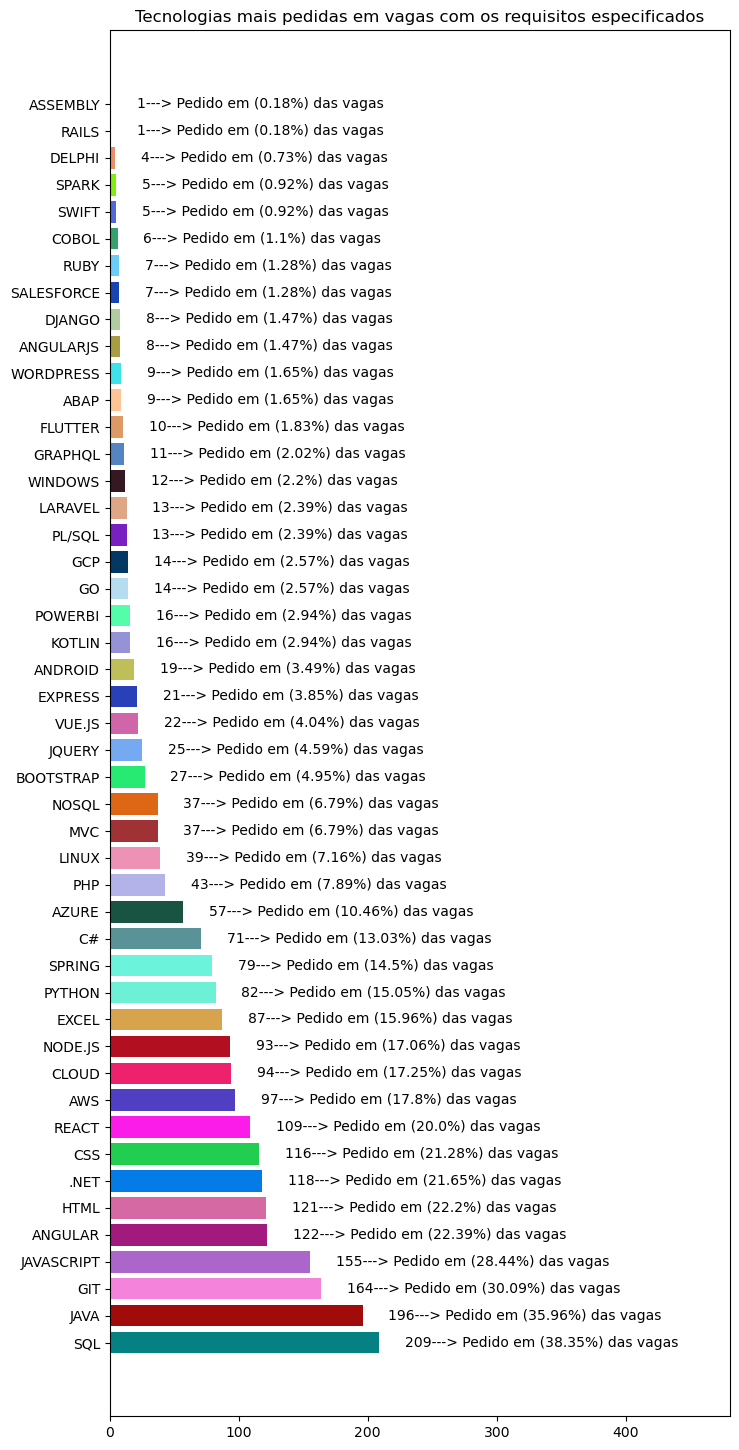

In [194]:
contagem_tecnologias = df.lista.value_counts()
cores = []
for _ in range(len(contagem_tecnologias)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(8, 18))

bars = plt.barh(contagem_tecnologias.index, contagem_tecnologias, color=cores)
plt.title("Tecnologias mais pedidas em vagas com os requisitos especificados")

for bar, valor in zip(bars, contagem_tecnologias):
    plt.text(bar.get_width()+20, bar.get_y() + bar.get_height()/2, f'{valor}---> Pedido em ({round((valor / (len(df_temp))*100),2)}%) das vagas', ha='left', va='center')
plt.xlim(right=max(contagem_tecnologias) * 2.3)
plt.show()

In [195]:
print("TEMOS " + str(len(dados_nao_nulos[dados_nao_nulos.requisitos=='Não especificado'])) +" VAGAS SEM REQUISITOS ESPECIFICADOS")

TEMOS 144 VAGAS SEM REQUISITOS ESPECIFICADOS


In [196]:
# dados_nao_nulos = dados_nao_nulos.drop(columns=['lista'])

In [197]:
# dados_nao_nulos[dados_nao_nulos['requisitos'].str.contains("GIT")].loc[10].description

In [198]:
regex_str_posicao = 'Estagiário|Estagiario|Junior|Júnior|JR|Nivel 1|Nivel I|Nível 1|Nível I|Pleno/Sênior|Senior|Sênior|SR|Pleno|Tech Lead|Tech-lead|Diretor|Coordenador|Gerente'


In [199]:
#Buscar posicao no titulo da vaga
def busca_posicao(title):
    tecnologia =''
    if re.findall(regex_str_posicao, title,re.IGNORECASE) != []:
        tecnologia = re.findall(regex_str_posicao, title,re.IGNORECASE)[0].upper().replace(" ","").replace("-","")
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia 

def busca_posicao_detalhe(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

def busca_posicao_descricao(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

In [200]:
dados_nao_nulos['posicao'] = dados_nao_nulos.title.apply(lambda x: busca_posicao(x))

In [201]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.experience_level.apply(lambda x: busca_posicao_detalhe(x))

In [202]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.description.apply(lambda x: busca_posicao_descricao(x))

In [203]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['SR', 'SENIOR']),'posicao']="SÊNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JÚNIOR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['NÍVELI','NÍVEL1']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['TECH LEAD,TECH-LEAD']),'posicao']="TECH-LEAD"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['ESTAGIÁRIO']),'posicao']="ESTAGIARIO"

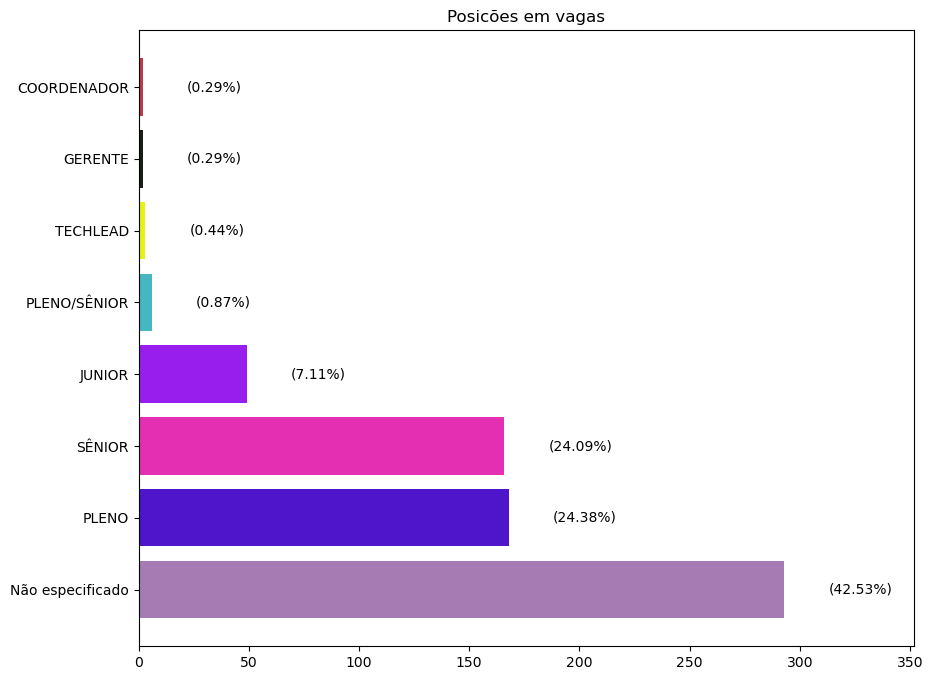

In [204]:
contagem_posicoes = dados_nao_nulos.posicao.value_counts()
cores = []
for _ in range(len(contagem_posicoes)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(10, 8))

bars = plt.barh(contagem_posicoes.index, contagem_posicoes, color=cores)
plt.title("Posicões em vagas")

for bar, valor in zip(bars, contagem_posicoes):
    plt.text(bar.get_width()+20, bar.get_y() + bar.get_height()/2, f'({round((valor / (len(dados_nao_nulos.posicao)))*100,2)}%)', ha='left', va='center')
plt.xlim(right=max(contagem_posicoes) * 1.2)
plt.show()

In [205]:
dados_grafico2=dados_nao_nulos[(dados_nao_nulos.posicao!='Não especificado') & (dados_nao_nulos.requisitos!='Não especificado') & (dados_nao_nulos.posicao!="DIRETOR")& (dados_nao_nulos.posicao!="COORDENADOR")& (dados_nao_nulos.posicao!="ESTAGIARIO")& (dados_nao_nulos.posicao!="GERENTE")& (dados_nao_nulos.posicao!="TECHLEAD")& (dados_nao_nulos.posicao!="PLENO/SÊNIOR")]  


In [206]:
dados_explodidos = dados_grafico2.assign(requisitos=dados_grafico2['requisitos'].str.split(', ')).explode('requisitos')

# Em seguida, agrupe pelos valores da coluna 'posicao' e conte os valores da coluna 'requisitos' após a explosão
contagem_requisitos = dados_explodidos.groupby('posicao')['requisitos'].value_counts()

contagem_requisitos2 = dados_explodidos.groupby(['posicao', 'requisitos']).size()

# Use value_counts() e depois nlargest() para obter os 10 principais valores
top10_por_posicao = contagem_requisitos2.groupby(level=0).nlargest(10).reset_index(level=1, drop=True)

# Agora você tem a contagem de cada requisito para cada posição


[[ 7.  8.  0.  9.  8. 12. 12. 15. 14.  0.  9. 19.]
 [31. 31. 25. 30.  0. 46. 27. 40. 33.  0. 30. 62.]
 [ 0. 38. 37. 39.  0. 53. 39. 61. 49. 38. 40. 71.]]


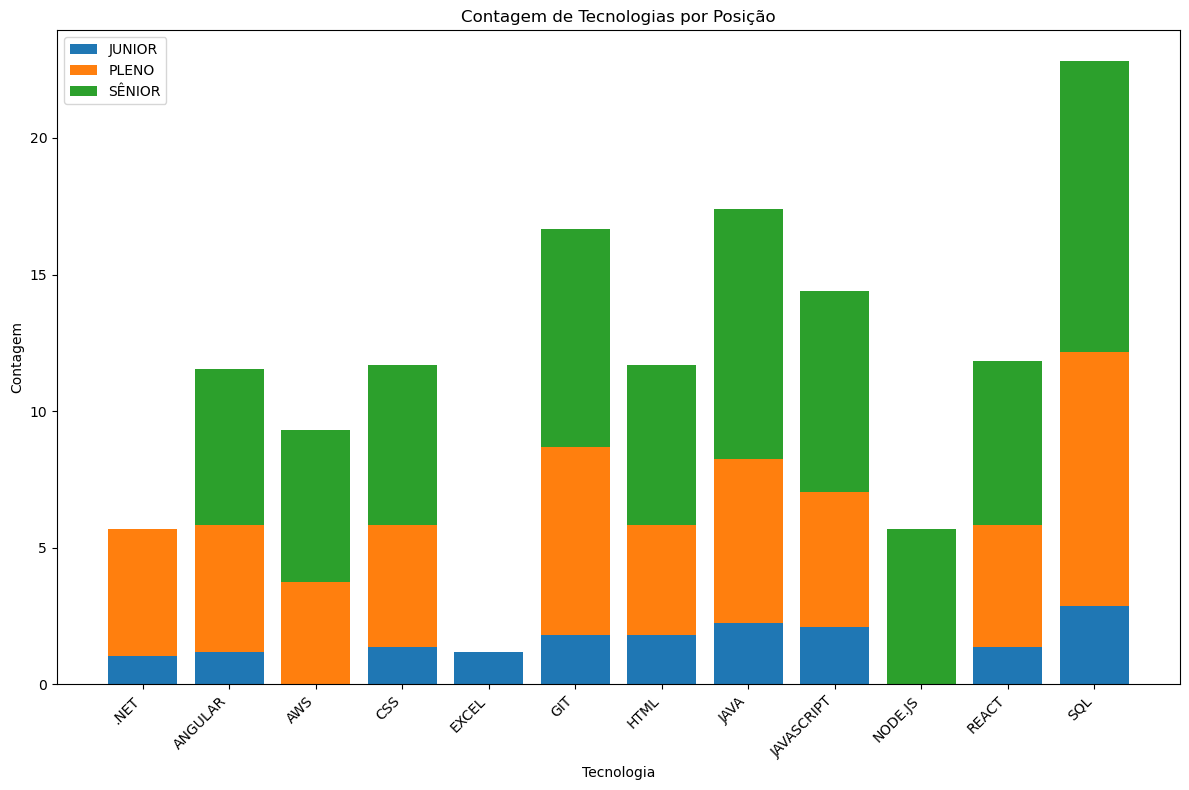

In [222]:
dados = top10_por_posicao

posicoes = sorted(set(posicao for posicao, _ in dados.keys()))
tecnologias = sorted(set(tecnologia for _, tecnologia in dados.keys()))

# Criar uma matriz de contagem de tecnologias para todas as posições
matriz_contagem = np.zeros((len(posicoes), len(tecnologias)))

# Preencher a matriz com as contagens reais
for i, posicao in enumerate(posicoes):
    for j, tecnologia in enumerate(tecnologias):
        matriz_contagem[i, j] = dados.get((posicao, tecnologia), 0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
print(matriz_contagem)


total_vacancies = np.sum(matriz_contagem)

# Percentages for each position
percentages = np.array([0.2438, 0.15, 0.15])  # Junior, Pleno, Senior

# Calculate target number of vacancies for each position
target_vacancies = percentages * total_vacancies

# Adjust the vacancies in the matrix according to the target number of vacancies
adjusted_matrix = np.zeros_like(matriz_contagem)
for i in range(matriz_contagem.shape[0]):
    for j in range(matriz_contagem.shape[1]):
        position_percentage = matriz_contagem[i, j] / total_vacancies
        adjusted_matrix[i, j] = target_vacancies[i] * position_percentage    
        
bottom = np.zeros(len(tecnologias))
for i, posicao in enumerate(posicoes):
    plt.bar(tecnologias, adjusted_matrix[i], label=posicao, bottom=bottom)
    bottom += adjusted_matrix[i]


plt.xlabel('Tecnologia')
plt.ylabel('Contagem')
plt.title('Contagem de Tecnologias por Posição')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

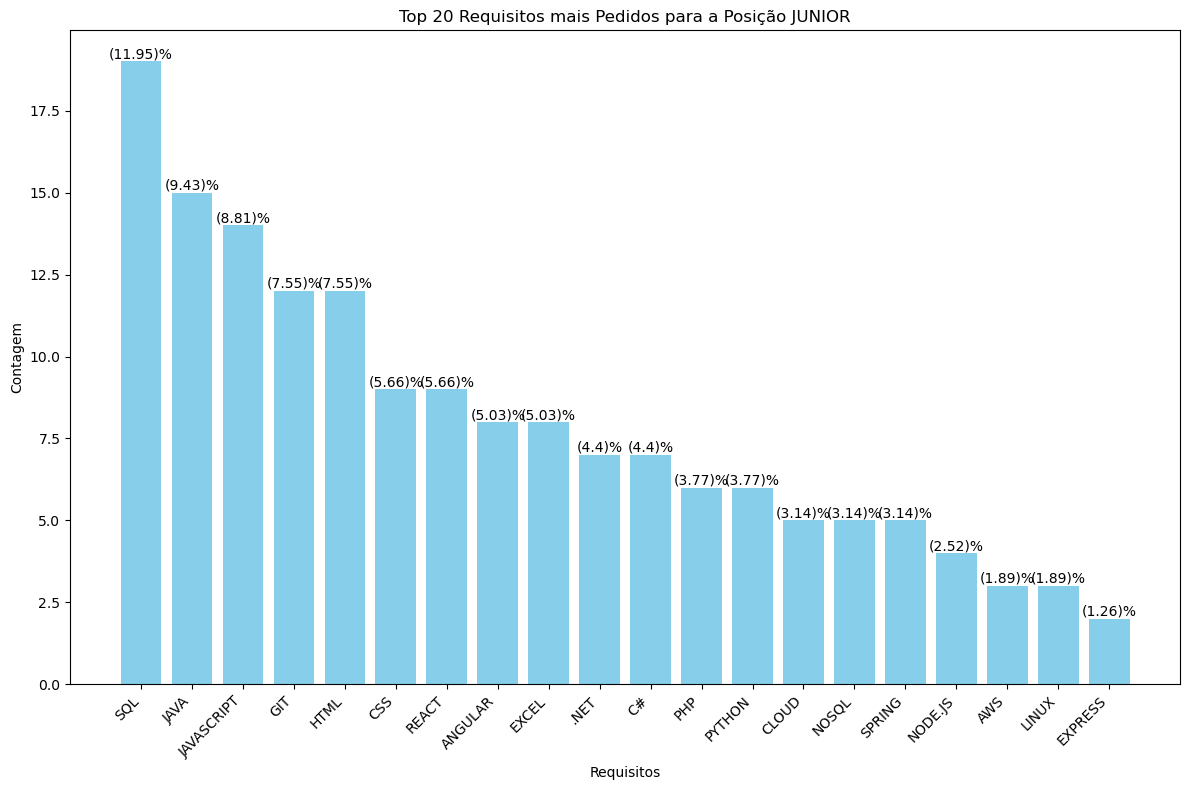

In [208]:
dados_junior = contagem_requisitos.loc['JUNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_junior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars=plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='skyblue')

for bar, valor in zip(bars, dados_junior_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_junior_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição JUNIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

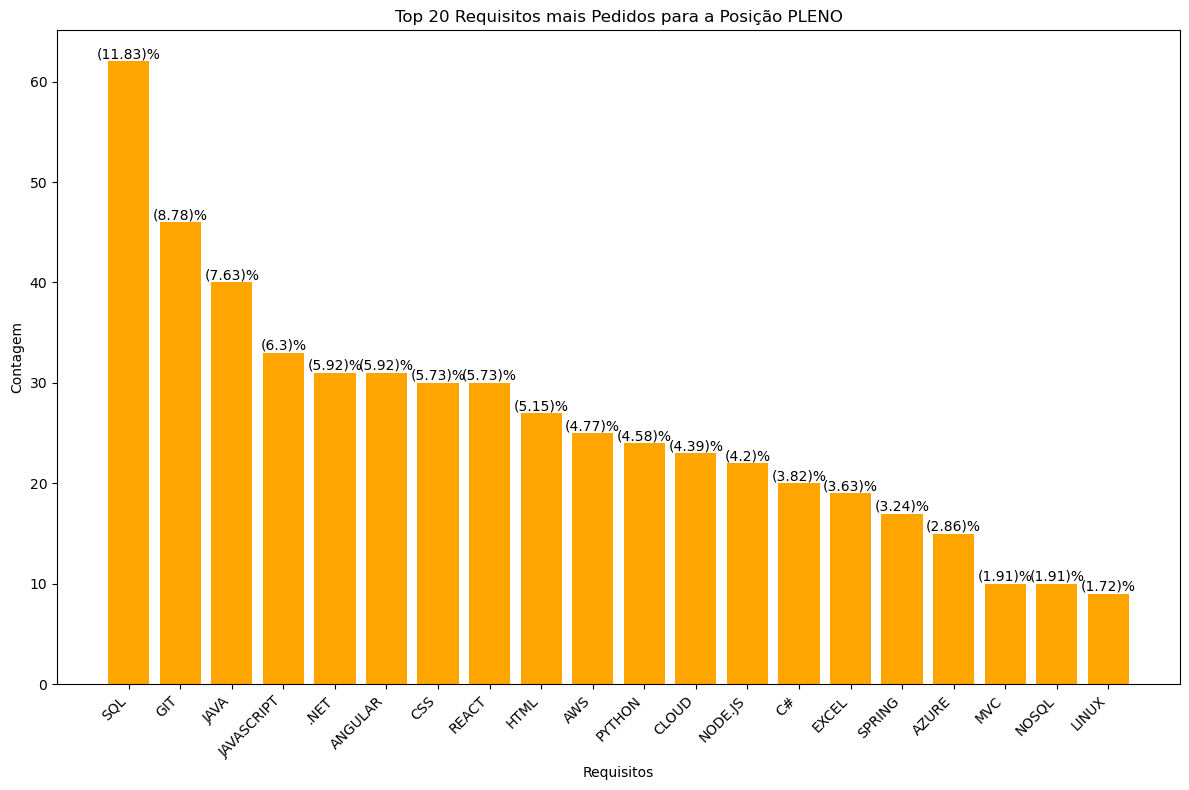

In [209]:
# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_pleno = contagem_requisitos.loc['PLENO']
dados_pleno_top10 = dados_pleno.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados_pleno_top10.index, dados_pleno_top10.values, color='orange')

for bar, valor in zip(bars, dados_pleno_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_pleno_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição PLENO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

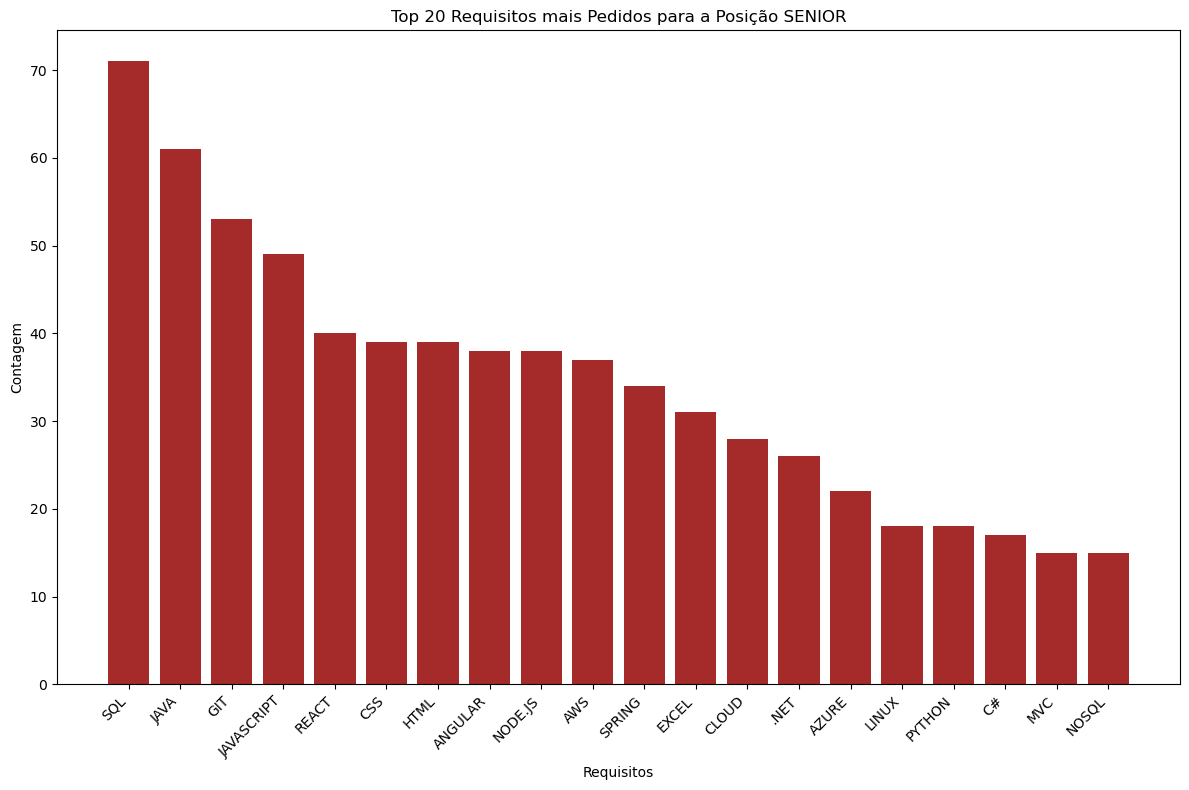

In [210]:
dados_senior = contagem_requisitos.loc['SÊNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_senior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='brown')
plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição SENIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [211]:
dados_nao_nulos.drop(columns=['lista'], inplace=True)

In [212]:
vagas_junior=dados_nao_nulos[dados_nao_nulos.posicao=="JUNIOR"]

In [213]:
vagas_junior.to_excel("vagas_junior.xlsx")

PermissionError: [Errno 13] Permission denied: 'vagas_junior.xlsx'

In [ ]:
dados_nao_nulos